# Entanglement entropy in a finite Heisenberg model

In [1]:
using LinearAlgebra, SparseArrays, DelimitedFiles, Plots #,Arpack

#Including the functions to construct a Hamiltonian and calculate the entanglement entropy
include("functions.jl") #MakeHam, RedDens, EntEntr, PopMul, BinDec, FindGS

## The singlet

Entanglement of the state $$|\psi>=\alpha|10>+\sqrt{1-\alpha^2}|01>$$ for different $$\alpha\in[0,1]$$

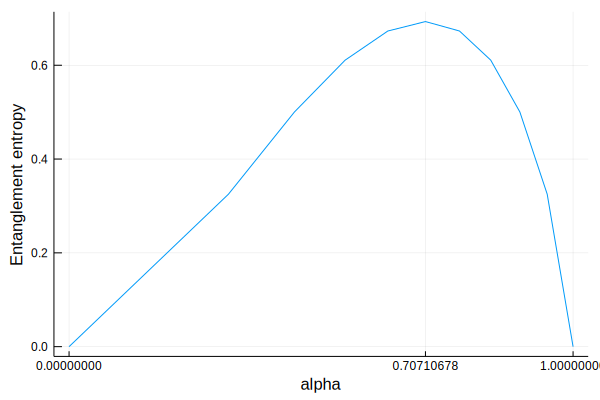

In [2]:
vals=Array{Float64}(undef, 11)

for i in 0:10
    vals[i+1]=EntEntr([0,sqrt(i/10),sqrt(1-(i/10)),0],[2])
end

plot([sqrt(i/10) for i in 0:10],vals,xlabel="alpha", ylabel="Entanglement entropy", 
    label="",xticks=[0,sqrt(1/2),1])

## Entanglement in the chain with $h=0$, N even

The interaction matrices:

In [3]:
function PlotHeis(Jxy,Jz,h,Nu)
    jmat = zeros(Float64, Nu, Nu, 3);
    for a in 1:3
        if a==3
            J=Jz
        else
            J=Jxy
        end

        for i in 1:Int(Nu-1)
            jmat[i,i+1,a]=jmat[i+1,i,a]=J
        end
    end
    ham = Matrix(MakeHam(jmat,Nu,h))
    eigsys = eigen(ham)
    gs=FindGS(eigsys)[:,1]
    vals = Array{Float64}(undef, Nu+1)
    for i in 0:Nu
        vals[i+1]=EntEntr(gs,collect(1:i))
    end
    vals
end
;

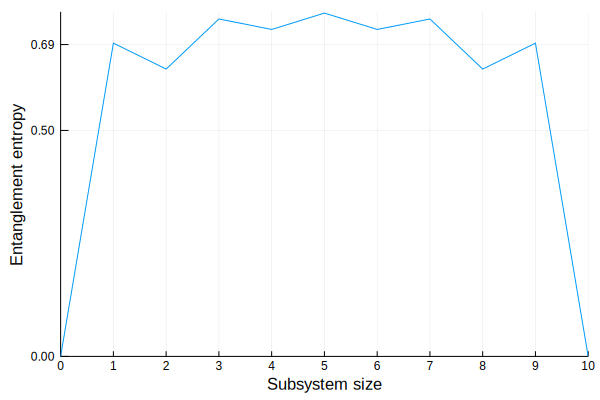

In [4]:
N=10
plot(0:N,PlotHeis(1,1,0,N),
    ylims=(0,1.1log(2)), xlims=(0,N), 
    xlabel="Subsystem size", ylabel="Entanglement entropy", 
    label="", xticks = 0:1:N, yticks = [0,0.5,0.69])

In [5]:
N=8
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=1
    end
end
ham = Matrix(MakeHam(jmat,N,0))
eigsys = eigen(ham)
gs=FindGS(eigsys)[:,1]

subsys = [2,3]

println(string(subsys)*": "*string(EntEntr(gs,subsys)))

[2, 3]: 0.9548755353111784


**Sending Jx, Jy to 0**

In [6]:
N=8
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=1
    end
end
#jmat

In [7]:
nop = 10 #number of plots
anim = @animate for i=1:nop
    plot(0:N,PlotHeis(1-(i-1)/nop,1,0,N),ylims=(0,1.07log(2)), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", 
        label="", xticks = 0:1:N, yticks = [0,0.5,0.69])
end
gif(anim, "EntHeisJ-to-0.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = C:\Users\Raphael Biertz\Documents\UNI\SS19\cmb\Entanglement-Entropy\EntHeisJ-to-0.gif
└ @ Plots C:\Users\Raphael Biertz\.julia\packages\Plots\oiirH\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\Raphael Biertz\\Documents\\UNI\\SS19\\cmb\\Entanglement-Entropy\\EntHeisJ-to-0.gif")

### Comparing to the Ising model

Degenerate ground state: 
$$
|\psi>=\frac{1}{\sqrt{2}}(|01010101>+|10101010>)
$$

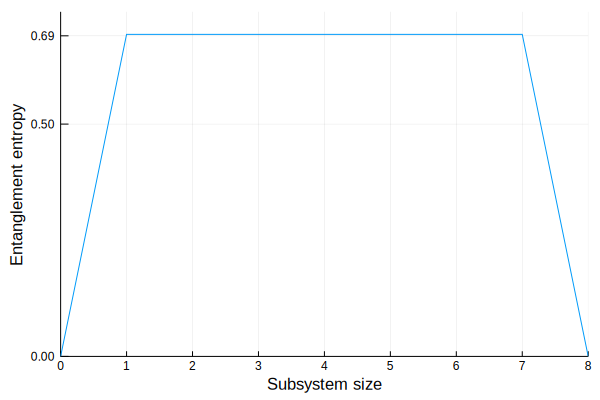

In [8]:
N=8
vals = Array{Float64}(undef, N+1)
state = zeros(Float64, 2^N)
state[85]=state[170]=sqrt(1/2) #the groundstate

for i in 0:N
    vals[i+1]=EntEntr(state,collect(1:i))
end


plot(0:N,vals,ylims=(0,1.07log(2)), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", 
        label="", xticks = 0:1:N, yticks = [0,0.5,0.69])

## Entanglement in a chain with $h\neq0$, N odd

Ground state of Ising model:
$$
|\psi>=|1010101>.
$$
Product state, so zero entanglement entropy.

In [9]:
N=7
nop = 10 #number of plots
anim = @animate for i=1:nop
    plot(0:N,PlotHeis(1-(i-1)/nop,1,1,N),ylims=(0,0.25), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", 
        label="", xticks = 0:1:N, yticks=0:0.05:0.25)
end
gif(anim, "EntHeisJ-to-0_h.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = C:\Users\Raphael Biertz\Documents\UNI\SS19\cmb\Entanglement-Entropy\EntHeisJ-to-0_h.gif
└ @ Plots C:\Users\Raphael Biertz\.julia\packages\Plots\oiirH\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\Raphael Biertz\\Documents\\UNI\\SS19\\cmb\\Entanglement-Entropy\\EntHeisJ-to-0_h.gif")

## Scaling

Sites labled as:  
 $$1\,\,2\,\,\,3\,\,\,\,4\,\,\,\,5\,\,\,\,6\\
   7\,\,8\,\,9\,\,10\,11\,12$$

Calculate the Hamilton-Matrix:

In [10]:
N=12
matrix=Heisenberg_2D(N,1,0)

4096×4096 Array{Float64,2}:
 16.0   0.0   0.0   0.0   0.0  0.0  0.0  …  0.0   0.0   0.0   0.0   0.0   0.0
  0.0  12.0   0.5   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.5  10.0   0.0   0.5  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  10.0   0.0  0.5  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.5   0.0  10.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.5   0.0  6.0  0.5  …  0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.5  8.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.5  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.5  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  0.5  …  0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  

Find the groundstate:

In [11]:
a=eigen(matrix)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
4096-element Array{Float64,1}:
 -16.614936573620646
 -16.606190588751247
 -13.552474699319866
 -13.545975150917346
 -12.892791003073272
 -12.885744361698775
 -12.697510989758547
 -12.697510989758518
 -12.672581155997818
 -12.672581155997793
 -12.664518562790558
 -12.664518562790557
 -12.647852141851697
   ⋮                
  12.065186766272824
  12.065186766272827
  12.092109992281497
  12.092109992281499
  12.092110092455473
  12.092110092455474
  12.623275682279283
  12.623275682279285
  12.626709019793926
  12.626709019793928
  16.0              
  16.0              
eigenvectors:
4096×4096 Array{Float64,2}:
  0.0            0.0           0.0          …   0.0          1.0  0.0
  0.0            0.0           0.0              0.483303     0.0  0.0
 -0.0            0.0           0.0              0.122478     0.0  0.0
  0.0            0.0           0.0             -7.57657e-19  0.0  0.0
  0.0            0.0           

In [12]:
gs=a.vectors[:,1];

## 1: 

Same boundary size for every subsystem

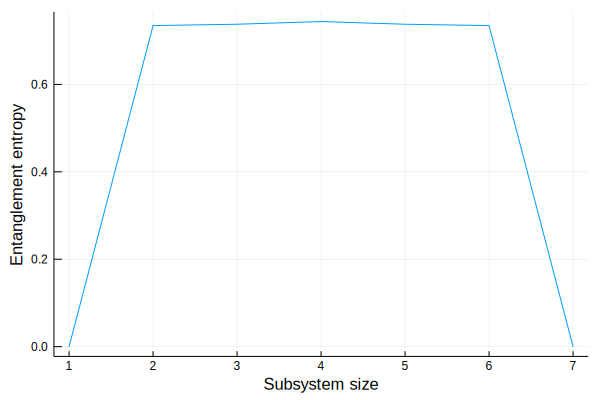

In [17]:
data = Array{Float32}(undef, Int((N/2)+1))
for i in 0:(Int(N/2))
    subs=Array{Int32}(undef, (i*2))
    for j in 1:i
        subs[j]=j
        subs[j+i]=j+Int(N/2)
    end
    data[i+1] = EntEntr(gs,subs)
end
plot(data, xlabel="Subsystem size", ylabel="Entanglement entropy", label="")

## 2:

Changing the size of the boundary

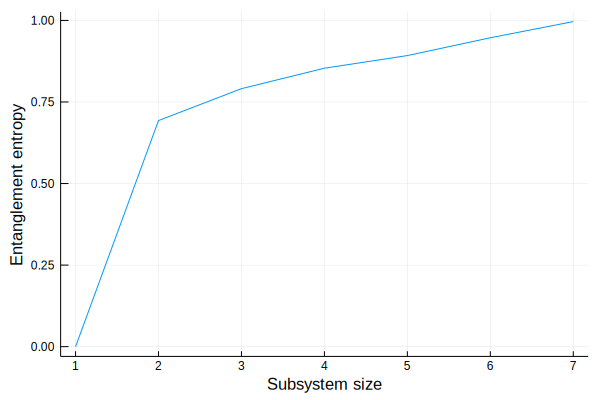

In [16]:
data = Array{Float32}(undef, Int((N/2)+1))
for i in 0:(Int(N/2))
    subs=Array{Int32}(undef, i)
    for j in 1:i
        subs[j]=j
    end
    data[i+1] = EntEntr(gs,subs)
end
plot(data, xlabel="Subsystem size", ylabel="Entanglement entropy", label="")